# Support Vector Machine 실습

---

In [23]:
%matplotlib inline

from sklearn.datasets import make_blobs
import mglearn
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV,train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.cm as cm

import warnings
warnings.simplefilter("ignore", UserWarning)

---

# Two-dimensional classification

*데이터 생성*

In [24]:
# 비선형 데이터
X, y = make_blobs(centers=4, random_state=8)

print('X:', X[0:6])
print('y:', y[0:6])

X: [[-1.72161036 -1.48033142]
 [-3.6573384  -9.5482383 ]
 [ 7.0778163   0.99508772]
 [-1.36579859 -0.3148625 ]
 [-2.66521206 -3.12591651]
 [ 7.63027116  8.69797933]]
y: [3 2 1 3 3 0]


Text(0,0.5,'Attribute 1')

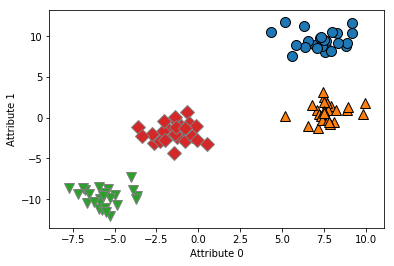

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

In [26]:
y = y % 2
print('y:', y[0:6])

y: [1 0 1 1 1 0]


Text(0,0.5,'Attribute 1')

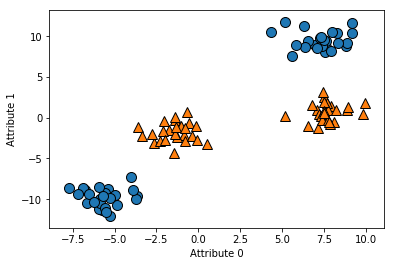

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

In [28]:
# 선형 SVM을 통한 모형 적합
from sklearn.svm import LinearSVC
model = LinearSVC()
linear_svm = model.fit(X, y)

In [29]:
linear_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0,0.5,'Attribute 1')

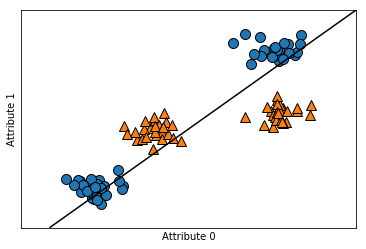

In [30]:
mglearn.plots.plot_2d_separator(classifier=linear_svm, X=X) # black line
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # data point
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

---

# Three-dimensional classification

- **데이터에 $\textbf{x}_{2th}^2$를 추가**
    - 선형 분류가 불가능한 데이터에서 x의 두번째 변수를 제곱한 변수를 추가하여 3차원으로 확장시키어 보도록하겠습니다.

In [31]:
print('Before X:', X[0:6])

Before X: [[-1.72161036 -1.48033142]
 [-3.6573384  -9.5482383 ]
 [ 7.0778163   0.99508772]
 [-1.36579859 -0.3148625 ]
 [-2.66521206 -3.12591651]
 [ 7.63027116  8.69797933]]


In [32]:
# 두 번째 변수를 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])
print('After X:', X_new[0:6])

After X: [[-1.72161036 -1.48033142  2.19138111]
 [-3.6573384  -9.5482383  91.16885455]
 [ 7.0778163   0.99508772  0.99019957]
 [-1.36579859 -0.3148625   0.09913839]
 [-2.66521206 -3.12591651  9.77135405]
 [ 7.63027116  8.69797933 75.65484441]]


In [33]:
# 각 클래스마다 다른 색깔을 입히기 위해 selection_idx 정의
selection_idx = y == 0
selection_idx

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False])

In [34]:
~selection_idx

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True])

Text(0.5,0,'(Attribute 1)^2')

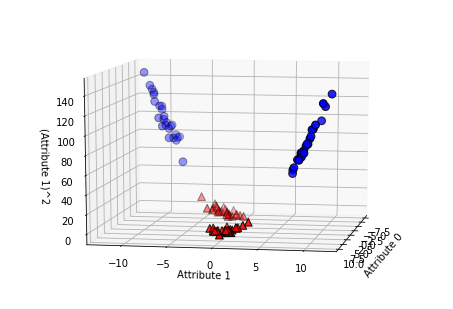

In [35]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
# elev: Elevation viewing angle
# azim: Azimuthal viewing angle
ax = Axes3D(figure, elev=10, azim=10)

# {c: color, marker: marker type, s: maker size}
ax.scatter(X_new[selection_idx, 0], X_new[selection_idx, 1], X_new[selection_idx, 2], c='b',marker='o', s=60, edgecolor='k')
ax.scatter(X_new[~selection_idx, 0], X_new[~selection_idx, 1], X_new[~selection_idx, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("Attribute 0")
ax.set_ylabel("Attribute 1")
ax.set_zlabel("(Attribute 1)^2")

**선형 SVM을 통한 모델 적합**

- 선형 분류가 불가능한 데이터에서 x의 제곱 변수를 추가하여 3차원으로 확장
- Linear SVM을 통한 분류가 가능함을 분류경계면 시각화를 통해서 확인

$ g(\textbf{x}) = w_1^Tx_1 + w_2^Tx_2 + w_3^Tx_3 +b$

In [36]:
# 3D 선형 SVM 모형 적합
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

In [37]:
print('coef: ', coef)
print('intercept: ',intercept)

coef:  [ 0.11474349 -0.19422663 -0.05440338]
intercept:  [1.1525909]


$ -w_3^Tx_3 = w_1^Tx_1 + w_2^Tx_2  +b$

$x_3 = (w_1^Tx_1 + w_2^Tx_2  +b) \div -w_3$

Text(0.5,0,'(Attribute 1)^2')

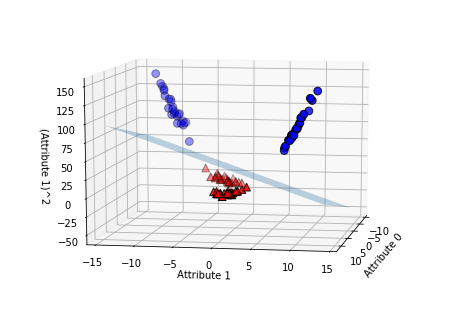

In [38]:
# 선형 초평면 그리기
figure = plt.figure()
# elev: Elevation viewing angle
# azim: Azimuthal viewing angle
ax = Axes3D(figure, elev=10, azim=10)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# (row stride, col stride): plot sample size 
# alpha: hyperplane shade
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# {c: color, marker: marker type, s: maker size}
ax.scatter(X_new[selection_idx, 0], X_new[selection_idx, 1], X_new[selection_idx, 2], c='b',marker='o', s=60, edgecolor='k')
ax.scatter(X_new[~selection_idx, 0], X_new[~selection_idx, 1], X_new[~selection_idx, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("Attribute 0")
ax.set_ylabel("Attribute 1")
ax.set_zlabel("(Attribute 1)^2")

**선형 SVM 판정 경계면**

앞선 모형 적합의 시각화를 기존 2차원의 시각화를 통해서 확인하면 아래와 같습니다.

$ g(\textbf{x}) = w_1^Tx_1 + w_2^Tx_2 + w_3^Tx_3 +b$

In [43]:
ZZ = YY ** 2

In [44]:
XX.shape

(50, 50)

In [45]:
[XX.ravel(), YY.ravel(), ZZ.ravel()]

[array([-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
        11.48674078, 11.92897802]),
 array([-14.11880698, -14.11880698, -14.11880698, ...,  13.78064756,
         13.78064756,  13.78064756]),
 array([199.34071046, 199.34071046, 199.34071046, ..., 189.90624717,
        189.90624717, 189.90624717])]

- To array(row axis)

In [46]:
tmp_arr = np.array([XX.ravel(), YY.ravel(), ZZ.ravel()])
tmp_arr

array([[ -9.74064658,  -9.29840934,  -8.85617211, ...,  11.04450355,
         11.48674078,  11.92897802],
       [-14.11880698, -14.11880698, -14.11880698, ...,  13.78064756,
         13.78064756,  13.78064756],
       [199.34071046, 199.34071046, 199.34071046, ..., 189.90624717,
        189.90624717, 189.90624717]])

- To array(col axis)

In [42]:
tmp_array = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
tmp_array

array([[ -9.74064658, -14.11880698, 199.34071046],
       [ -9.29840934, -14.11880698, 199.34071046],
       [ -8.85617211, -14.11880698, 199.34071046],
       ...,
       [ 11.04450355,  13.78064756, 189.90624717],
       [ 11.48674078,  13.78064756, 189.90624717],
       [ 11.92897802,  13.78064756, 189.90624717]])

In [47]:
dec = linear_svm_3d.decision_function(tmp_array)
dec

array([ -8.06764563,  -8.01690179,  -7.96615794, ..., -10.58823548,
       -10.53749164, -10.4867478 ])

In [48]:
dec_z = dec.reshape(XX.shape)
dec_z

array([[ -8.06764563,  -8.01690179,  -7.96615794, ...,  -5.68268506,
         -5.63194122,  -5.58119738],
       [ -7.321182  ,  -7.27043816,  -7.21969432, ...,  -4.93622144,
         -4.8854776 ,  -4.83473375],
       [ -6.60999241,  -6.55924857,  -6.50850473, ...,  -4.22503185,
         -4.17428801,  -4.12354417],
       ...,
       [-11.11508974, -11.06434589, -11.01360205, ...,  -8.73012917,
         -8.67938533,  -8.62864149],
       [-12.02650587, -11.97576203, -11.92501819, ...,  -9.64154531,
         -9.59080146,  -9.54005762],
       [-12.97319604, -12.9224522 , -12.87170836, ..., -10.58823548,
        -10.53749164, -10.4867478 ]])

Text(0,0.5,'Attribute 1')

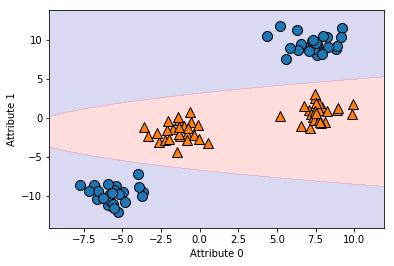

In [49]:
# 3D를 통환 비선형 분류 경계면
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

# XX.shape:  (50 x 50) grid
plt.contourf(XX, YY, dec_z, levels=[dec.min()-2, 0, dec.max()+2],
             cmap=mglearn.cm2, alpha=0.15)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

---